In [413]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_json('StreamingHistory_music_0.json')
raw_data.head()

,endTime,artistName,trackName,msPlayed
0,2023-12-06 11:15,5 Seconds of Summer,Ghost Of You,131318
1,2023-12-06 11:17,Olivia Rodrigo,favorite crime,152666
2,2023-12-06 11:20,Olivia Rodrigo,"jealousy, jealousy",173160
3,2023-12-06 11:24,Melanie Martinez,Soap,209426
4,2023-12-06 11:27,Beach Weather,"Sex, Drugs, Etc.",196784


In [414]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5025 entries, 0 to 5024
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     5025 non-null   object
 1   artistName  5025 non-null   object
 2   trackName   5025 non-null   object
 3   msPlayed    5025 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 157.2+ KB


In [415]:
raw_data.describe()

,msPlayed
count,5025.000000
mean,151419.424876
std,79428.593571
min,0.000000
25%,117809.000000
50%,167706.000000
75%,203886.000000
max,852009.000000


## Remove all data prior to 2024

In [416]:
raw_data['endTime'] = pd.to_datetime(raw_data['endTime'])

data = pd.DataFrame({
    "date": raw_data['endTime'].dt.date,                   
    "time": raw_data['endTime'].dt.time,                   
    "track_name": raw_data['trackName'],                  
    "artist_name": raw_data['artistName'],                
    "minutes_played": raw_data['msPlayed'] / 60000,
    "seconds_played": raw_data['msPlayed'] / 1000   
})

print(data)

         date       time        track_name         artist_name       minutes_played  seconds_played
0     2023-12-06  11:15:00        Ghost Of You  5 Seconds of Summer     2.188633         131.318   
1     2023-12-06  11:17:00      favorite crime       Olivia Rodrigo     2.544433         152.666   
2     2023-12-06  11:20:00  jealousy, jealousy       Olivia Rodrigo     2.886000         173.160   
3     2023-12-06  11:24:00                Soap     Melanie Martinez     3.490433         209.426   
4     2023-12-06  11:27:00    Sex, Drugs, Etc.        Beach Weather     3.279733         196.784   
...          ...       ...                 ...                  ...             ...             ...
5020  2024-12-06  10:04:00           Kill Bill                  SZA     2.565767         153.946   
5021  2024-12-06  10:07:00  You Get Me So High    The Neighbourhood     2.550000         153.000   
5022  2024-12-06  10:10:00            Softcore    The Neighbourhood     3.438000         206.280   


In [417]:
data = data[data['date'] > date(2023, 12, 31)]
data = data.reset_index(drop=True)
print(data)

         date       time        track_name         artist_name       minutes_played  seconds_played
0     2024-01-04  04:38:00          THAT BITCH           Bea Miller     0.037850           2.271   
1     2024-01-04  04:38:00                 You               Regard     3.889767         233.386   
2     2024-01-04  04:38:00                 You               Regard     0.009000           0.540   
3     2024-01-04  04:38:00     i'm so tired...                 Lauv     0.035333           2.120   
4     2024-01-04  04:42:00                 You               Regard     3.889767         233.386   
...          ...       ...                 ...                  ...             ...             ...
4873  2024-12-06  10:04:00           Kill Bill                  SZA     2.565767         153.946   
4874  2024-12-06  10:07:00  You Get Me So High    The Neighbourhood     2.550000         153.000   
4875  2024-12-06  10:10:00            Softcore    The Neighbourhood     3.438000         206.280   


## Data Visualization

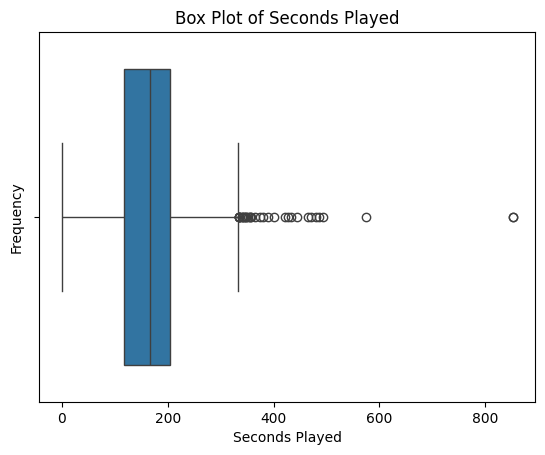

In [418]:
sns.boxplot(x='seconds_played', data=data)
plt.title('Box Plot of Seconds Played')
plt.xlabel('Seconds Played')
plt.ylabel('Frequency')
plt.show()

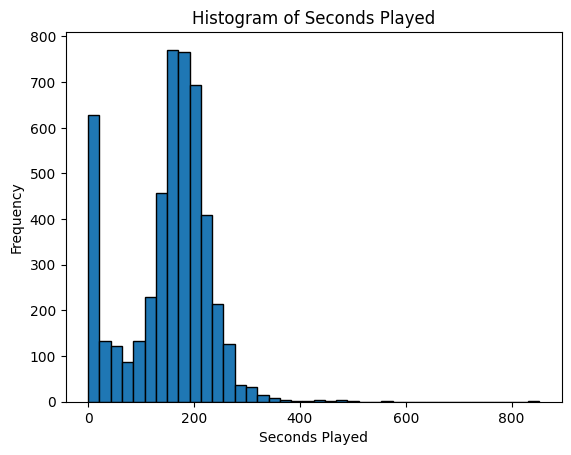

In [419]:
plt.hist(data['seconds_played'], bins=40, edgecolor='k')
plt.title('Histogram of Seconds Played')
plt.xlabel('Seconds Played')
plt.ylabel('Frequency')
plt.show()

In [420]:
min_value = data['seconds_played'].min()
max_value = data['seconds_played'].max()
bin_width = (max_value - min_value) / 40
first_bin_start = min_value
first_bin_end = min_value + bin_width

print(f"First bin starts at {first_bin_start} and ends at {first_bin_end}, with a width of {bin_width}")

First bin starts at 0.0 and ends at 21.300225, with a width of 21.300225


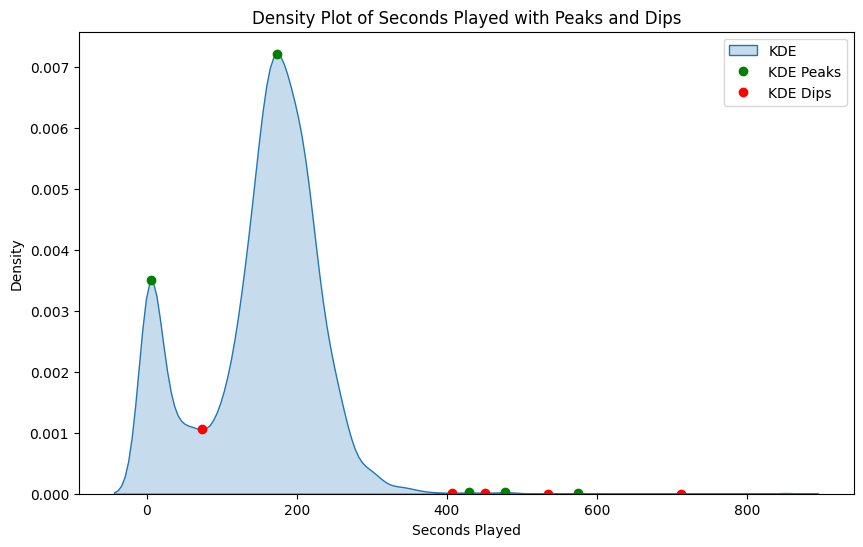

Peaks:
Peak at 5.69 with density 0.0035
Peak at 173.43 with density 0.0072
Peak at 429.32 with density 0.0000
Peak at 477.66 with density 0.0000
Peak at 574.32 with density 0.0000

Dips:
Dip at 73.92 with density 0.0011
Dip at 406.58 with density 0.0000
Dip at 451.12 with density 0.0000
Dip at 534.52 with density 0.0000
Dip at 712.69 with density 0.0000


In [421]:
seconds = data['seconds_played']

# Compute KDE
kde = gaussian_kde(seconds)
x = np.linspace(seconds.min(), seconds.max(), 900)
kde_values = kde(x)

# Find the peaks and dips
peaks = np.diff(np.sign(np.diff(kde_values))) < 0
peak_x = x[1:-1][peaks]
peak_kde = kde_values[1:-1][peaks]

dips = np.diff(np.sign(np.diff(kde_values))) > 0
dip_x = x[1:-1][dips]
dip_kde = kde_values[1:-1][dips]

# Plot KDE, peaks, and dips
plt.figure(figsize=(10, 6))
sns.kdeplot(seconds, fill=True, label='KDE')
plt.plot(peak_x, peak_kde, 'go', label='KDE Peaks')
plt.plot(dip_x, dip_kde, 'ro', label='KDE Dips')
plt.title('Density Plot of Seconds Played with Peaks and Dips')
plt.xlabel('Seconds Played')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the peaks and dips
print("Peaks:")
for peak, value in zip(peak_x, peak_kde):
    print(f"Peak at {peak:.2f} with density {value:.4f}")

print("\nDips:")
for dip, value in zip(dip_x, dip_kde):
    print(f"Dip at {dip:.2f} with density {value:.4f}")

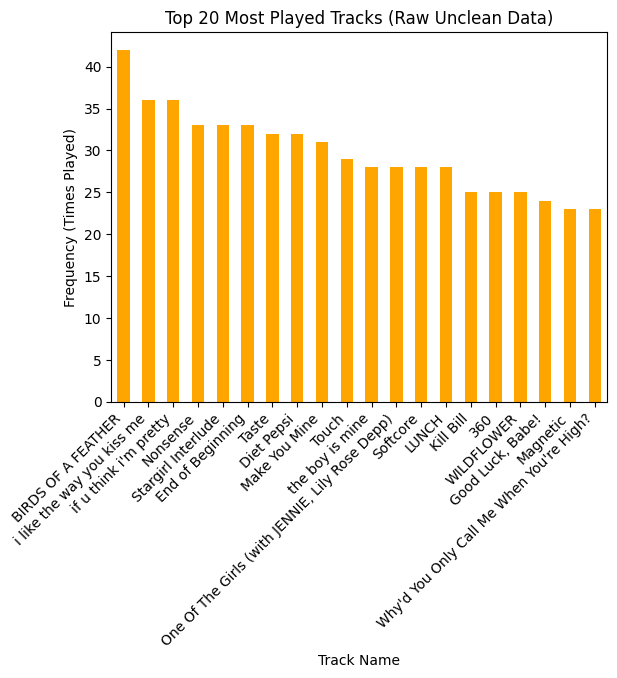

In [422]:
data['track_name'].value_counts().head(20).plot(kind='bar', color='orange')
plt.title('Top 20 Most Played Tracks (Raw Unclean Data)')
plt.xlabel('Track Name')
plt.ylabel('Frequency (Times Played)')
plt.xticks(rotation=45, ha='right')
plt.show()

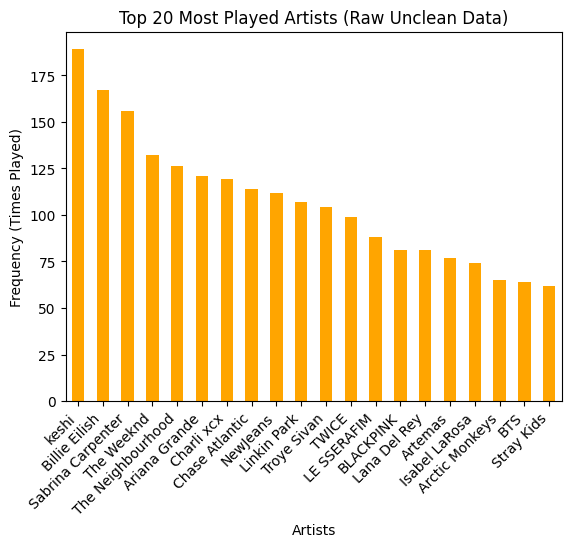

In [424]:
data['artist_name'].value_counts().head(20).plot(kind='bar', color='orange')
plt.title('Top 20 Most Played Artists (Raw Unclean Data)')
plt.xlabel('Artists')
plt.ylabel('Frequency (Times Played)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Data Cleaning

In [425]:
#getting rid of the tracks that were skipped
data=data[data['seconds_played']>22]

In [426]:
# Calculate the mean of seconds played for each track 
mean_seconds_played = data.groupby(['track_name', 'artist_name'])['seconds_played'].mean()

filtered_data = data.copy() 

# only keep rows where seconds_played is greater than or equal to the mean for that track
filtered_data = data[data.apply(lambda row: row['seconds_played'] >= mean_seconds_played[row['track_name'], row['artist_name']], axis=1)]
filtered_data = filtered_data[filtered_data.apply(lambda row: row['seconds_played'] >= mean_seconds_played[row['track_name'], row['artist_name']], axis=1)]

# add columns for times played and total minutes played for each track
filtered_data['times_played'] = filtered_data.groupby(['track_name', 'artist_name'])['track_name'].transform('count')
filtered_data['total_minutes'] = filtered_data.groupby(['track_name', 'artist_name'])['minutes_played'].transform('sum')

#remove all duplicate rows (one track appears once)
filtered_data.drop_duplicates(subset=['track_name', 'artist_name'], inplace=True)

filtered_data.index = pd.RangeIndex(start=1, stop=len(filtered_data) + 1)
print(filtered_data)

         date       time                              track_name                             artist_name   minutes_played  seconds_played  times_played  total_minutes
1     2024-01-04  04:38:00                                                              You        Regard     3.889767         233.386           3         11.669300  
2     2024-01-04  04:49:00                                                             Easy   Troye Sivan     3.779683         226.781           5         18.885750  
3     2024-01-04  04:57:00                                                    Somebody Else      The 1975     5.792083         347.525           1          5.792083  
4     2024-01-04  05:00:00                                                           Maniac    Conan Gray     3.096217         185.773           5         15.385517  
5     2024-01-04  05:02:00                                                        False God  Taylor Swift     1.458000          87.480           1          1.458000 

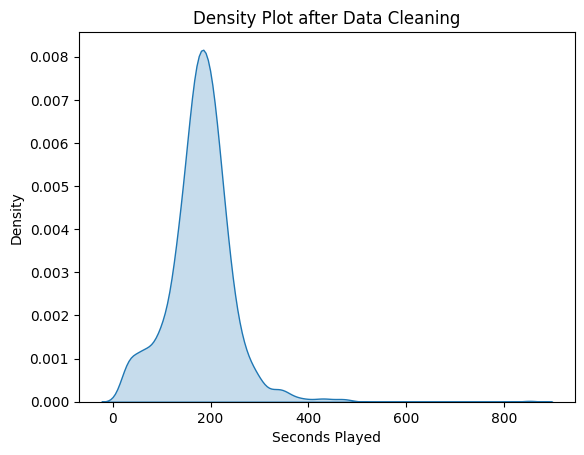

In [427]:
#checking density plot after data cleaning 

sns.kdeplot(filtered_data['seconds_played'], fill=True)
plt.title('Density Plot after Data Cleaning')
plt.xlabel('Seconds Played')
plt.ylabel('Density')
plt.show()

## Top Tracks By Times Played

In [428]:
top_tracks_times_played = filtered_data.copy() 
top_tracks_times_played = top_tracks_times_played[['track_name', 'artist_name', 'times_played']]

top_tracks_times_played.sort_values(by='times_played', ascending=False, inplace=True)
top_tracks_times_played.index = pd.RangeIndex(start=1, stop=len(top_tracks_times_played) + 1)

#top 10 tracks according to times played
top_tracks_times_played[['track_name', 'artist_name', 'times_played']].head(10)

,track_name,artist_name,times_played
1,BIRDS OF A FEATHER,Billie Eilish,36
2,Nonsense,Sabrina Carpenter,30
3,Stargirl Interlude,The Weeknd,28
4,if u think i'm pretty,Artemas,27
5,End of Beginning,Djo,27
6,Touch,KATSEYE,27
7,Make You Mine,Madison Beer,27
8,i like the way you kiss me,Artemas,26
9,Softcore,The Neighbourhood,26
10,Kill Bill,SZA,23


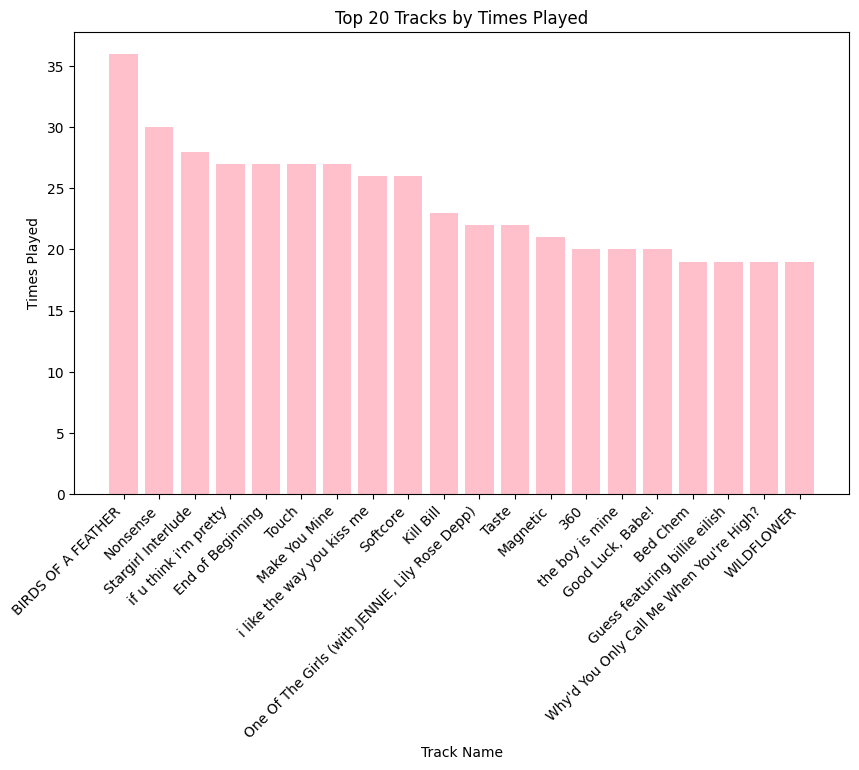

In [429]:
top_20_tracks = top_tracks_times_played[['track_name', 'artist_name', 'times_played']].head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_20_tracks['track_name'], top_20_tracks['times_played'], color='pink')
plt.title('Top 20 Tracks by Times Played')
plt.xlabel('Track Name')
plt.ylabel('Times Played')
plt.xticks(rotation=45, ha='right')
plt.show()

In [430]:
#top 20 tracks according to times played
top_tracks_times_played[['track_name', 'artist_name', 'times_played']].head(20)

,track_name,artist_name,times_played
1,BIRDS OF A FEATHER,Billie Eilish,36
2,Nonsense,Sabrina Carpenter,30
3,Stargirl Interlude,The Weeknd,28
4,if u think i'm pretty,Artemas,27
5,End of Beginning,Djo,27
6,Touch,KATSEYE,27
7,Make You Mine,Madison Beer,27
8,i like the way you kiss me,Artemas,26
9,Softcore,The Neighbourhood,26
10,Kill Bill,SZA,23


In [431]:
# Save the top tracks to a CSV file
top_tracks_times_played[['track_name', 'artist_name', 'times_played']].to_csv('top_tracks_times_played.csv', index=True)
print("Top tracks saved to top_tracks_times_played.csv")

Top tracks saved to top_tracks_times_played.csv


## Top artists by times played

In [432]:
top_artists_times_played = filtered_data.copy() 
top_artists_times_played = top_artists_times_played.groupby('artist_name')['times_played'].sum()
top_artists_times_played.sort_values(ascending=False, inplace=True)

# Reset index to get a DataFrame with the correct indexing
top_artists_times_played = top_artists_times_played.reset_index()
top_artists_times_played.index = pd.RangeIndex(start=1, stop=len(top_artists_times_played) + 1)

# Display the top 10 artists by times played
top_artists_times_played[['artist_name', 'times_played']].head(10)

,artist_name,times_played
1,keshi,125
2,Sabrina Carpenter,112
3,Billie Eilish,106
4,The Neighbourhood,99
5,The Weeknd,98
6,NewJeans,98
7,Ariana Grande,90
8,Chase Atlantic,89
9,Troye Sivan,84
10,Charli xcx,80


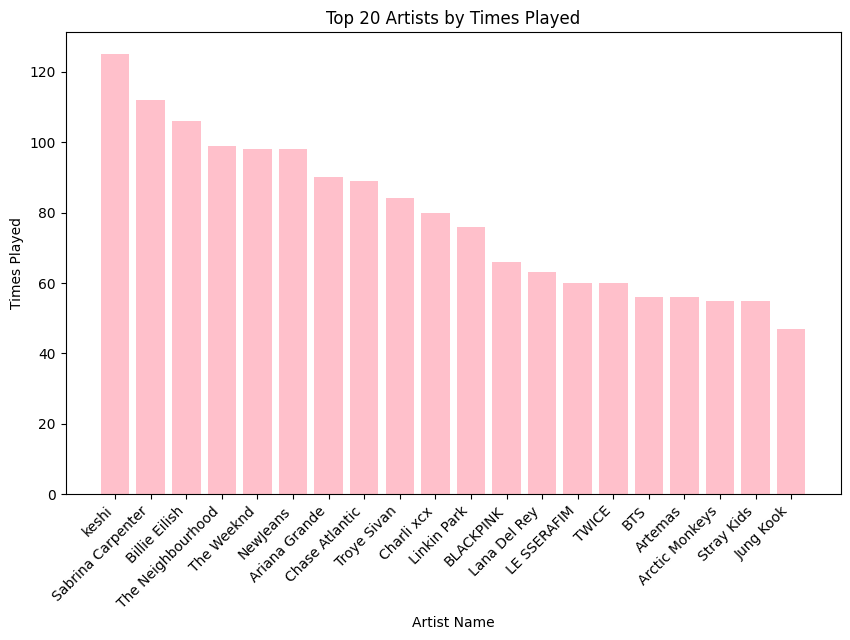

In [433]:
top_20_artists = top_artists_times_played[['artist_name', 'times_played']].head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_20_artists['artist_name'], top_20_artists['times_played'], color='pink')
plt.title('Top 20 Artists by Times Played')
plt.xlabel('Artist Name')
plt.ylabel('Times Played')
plt.xticks(rotation=45, ha='right')
plt.show()

In [434]:
#top 20 artists according to times played
top_artists_times_played[['artist_name', 'times_played']].head(20)

,artist_name,times_played
1,keshi,125
2,Sabrina Carpenter,112
3,Billie Eilish,106
4,The Neighbourhood,99
5,The Weeknd,98
6,NewJeans,98
7,Ariana Grande,90
8,Chase Atlantic,89
9,Troye Sivan,84
10,Charli xcx,80


In [435]:
# Save the top artists to a CSV file
top_artists_times_played[['artist_name', 'times_played']].to_csv('top_artists_times_played.csv', index=True)
print("Top artists saved to top_artists_times_played.csv")

Top artists saved to top_artists_times_played.csv


## Top Tracks By Total Minutes Played

In [436]:
top_tracks_minutes_played = filtered_data.copy() 
top_tracks_minutes_played = top_tracks_minutes_played[['track_name', 'artist_name', 'total_minutes']]

top_tracks_minutes_played.sort_values(by='total_minutes', ascending=False, inplace=True)
top_tracks_minutes_played.index = pd.RangeIndex(start=1, stop=len(top_tracks_minutes_played) + 1)

#top 10 tracks according to seconds played
top_tracks_minutes_played[['track_name', 'artist_name', 'total_minutes']].head(10)

,track_name,artist_name,total_minutes
1,BIRDS OF A FEATHER,Billie Eilish,126.223800
2,Make You Mine,Madison Beer,104.131400
3,CHIHIRO,Billie Eilish,91.032000
4,"One Of The Girls (with JENNIE, Lily Rose Depp)",The Weeknd,89.717467
5,Softcore,The Neighbourhood,89.358767
6,WILDFLOWER,Billie Eilish,82.815933
7,Nonsense,Sabrina Carpenter,81.824000
8,"Good Luck, Babe!",Chappell Roan,72.503550
9,End of Beginning,Djo,72.137433
10,Daddy Issues,The Neighbourhood,70.913717


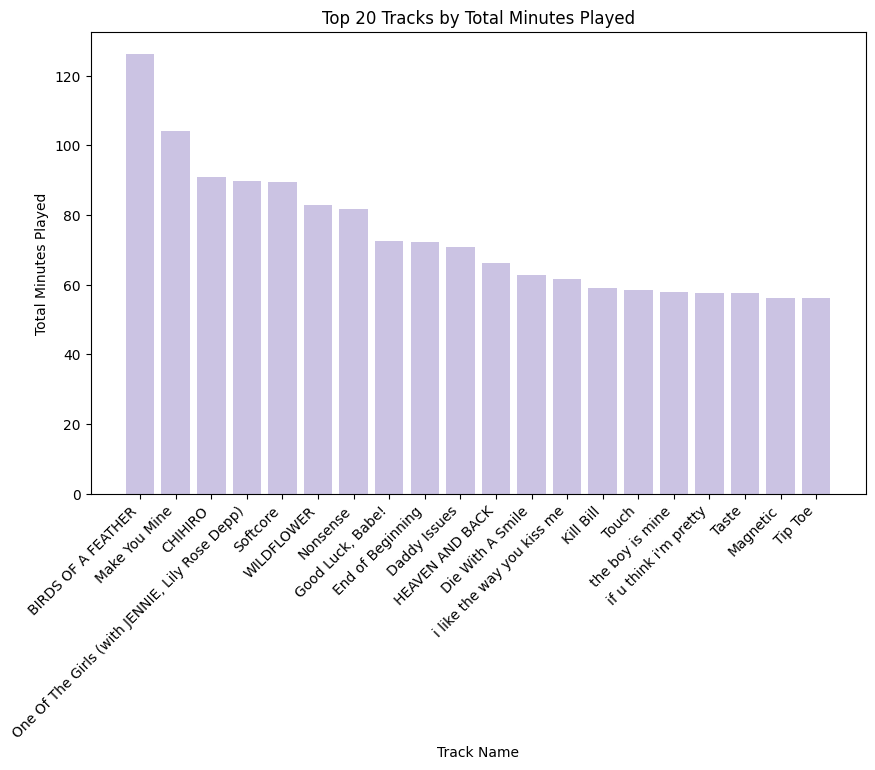

In [437]:
top_20_tracks = top_tracks_minutes_played[['track_name', 'artist_name', 'total_minutes']].head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_20_tracks['track_name'], top_20_tracks['total_minutes'], color='#CBC3E3')
plt.title('Top 20 Tracks by Total Minutes Played')
plt.xlabel('Track Name')
plt.ylabel('Total Minutes Played')
plt.xticks(rotation=45, ha='right')
plt.show()

In [438]:
#top 20 tracks according to total minutes played
top_tracks_minutes_played[['track_name', 'artist_name', 'total_minutes']].head(20)

,track_name,artist_name,total_minutes
1,BIRDS OF A FEATHER,Billie Eilish,126.223800
2,Make You Mine,Madison Beer,104.131400
3,CHIHIRO,Billie Eilish,91.032000
4,"One Of The Girls (with JENNIE, Lily Rose Depp)",The Weeknd,89.717467
5,Softcore,The Neighbourhood,89.358767
6,WILDFLOWER,Billie Eilish,82.815933
7,Nonsense,Sabrina Carpenter,81.824000
8,"Good Luck, Babe!",Chappell Roan,72.503550
9,End of Beginning,Djo,72.137433
10,Daddy Issues,The Neighbourhood,70.913717


## Top Artists By Total Minutes Played

In [439]:
top_artists_minutes_played = filtered_data.copy() 
top_artists_minutes_played = top_artists_minutes_played.groupby('artist_name')['total_minutes'].sum()
top_artists_minutes_played.sort_values(ascending=False, inplace=True)

# Reset index to get a DataFrame with the correct indexing
top_artists_minutes_played = top_artists_minutes_played.reset_index()
top_artists_minutes_played.index = pd.RangeIndex(start=1, stop=len(top_artists_minutes_played) + 1)

# Display the top 10 artists by times played
top_artists_minutes_played[['artist_name', 'total_minutes']].head(10)

,artist_name,total_minutes
1,Billie Eilish,413.883633
2,keshi,376.961233
3,The Neighbourhood,364.525667
4,Chase Atlantic,334.982233
5,Sabrina Carpenter,323.813983
6,The Weeknd,322.468300
7,Ariana Grande,285.842950
8,Troye Sivan,280.663800
9,NewJeans,259.959483
10,Lana Del Rey,244.327000


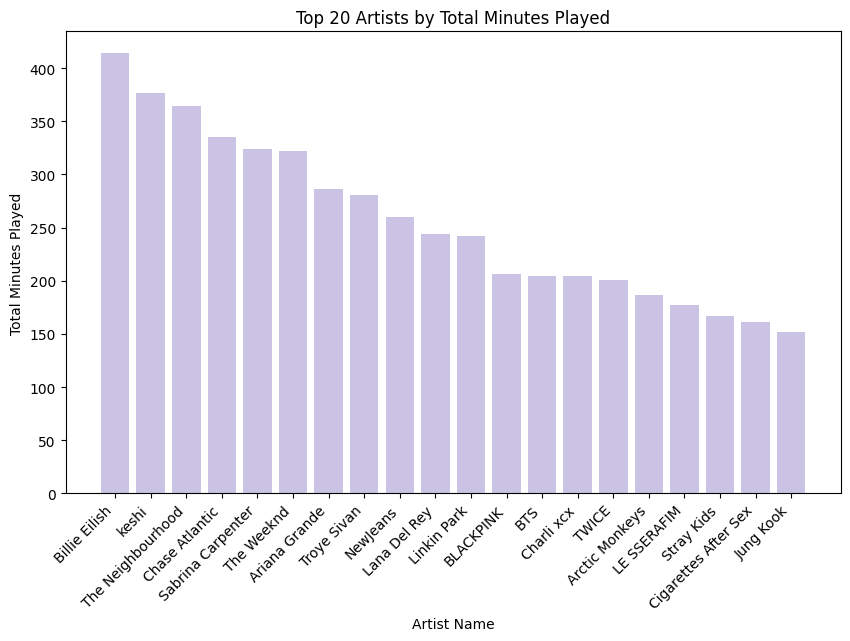

In [440]:
top_20_artists = top_artists_minutes_played[['artist_name', 'total_minutes']].head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_20_artists['artist_name'], top_20_artists['total_minutes'], color='#CBC3E3')
plt.title('Top 20 Artists by Total Minutes Played')
plt.xlabel('Artist Name')
plt.ylabel('Total Minutes Played')
plt.xticks(rotation=45, ha='right')
plt.show()

In [441]:
#top 20 artists according to total minutes played
top_artists_minutes_played[['artist_name', 'total_minutes']].head(20)

,artist_name,total_minutes
1,Billie Eilish,413.883633
2,keshi,376.961233
3,The Neighbourhood,364.525667
4,Chase Atlantic,334.982233
5,Sabrina Carpenter,323.813983
6,The Weeknd,322.468300
7,Ariana Grande,285.842950
8,Troye Sivan,280.663800
9,NewJeans,259.959483
10,Lana Del Rey,244.327000


## Comparison of Rankings

In [442]:
# to display table center-aligned
def pd_centered(df):
    return df.style.set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "td", "props": [("text-align", "center")]}])

In [443]:
combined_df = pd.concat([
    top_tracks_times_played.head(5),      # Top 5 rows from top_tracks_times_played
    top_tracks_minutes_played.head(5),    # Top 5 rows from top_tracks_minutes_played
], axis=1)

# Add a blank separator column
combined_df.insert(3, " ", " ") 

combined_df.columns = [
    'Track Name', 'Artist Name', 'Times Played', ' ', 'Track_Name', 'Artist_Name', 'Total Minutes'
]

# Create MultiIndex with different labels for each column
combined_df.columns = pd.MultiIndex.from_tuples(
    [('Top Tracks By Times Played', col) if col in ['Track Name', 'Artist Name', 'Times Played'] 
     else ('versus', col) if col in [' ']
    else ('Top Tracks By Total Minutes', col) for col in combined_df.columns]
)

display(pd_centered(combined_df))


In [444]:
combined_df2 = pd.concat([
    top_artists_times_played.head(5),      # Top 5 rows from top_artists_times_played
    top_artists_minutes_played.head(5),    # Top 5 rows from top_artists_minutes_played
], axis=1)

# Add a blank separator column
combined_df2.insert(2, " ", " ") 

combined_df2.columns = [
    'Artist Name', 'Times Played', ' ', 'Artist_Name', 'Total Minutes'
]

# Create MultiIndex with different labels for each column
combined_df2.columns = pd.MultiIndex.from_tuples(
    [('Top Artists By Times Played', col) if col in ['Artist Name', 'Times Played'] 
     else ('versus', col) if col in [' ']
    else ('Top Artists By Total Minutes', col) for col in combined_df2.columns]
)

display(pd_centered(combined_df2))
